In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
from sklearn import datasets
linnerud = datasets.load_linnerud()

In [79]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [80]:
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)

In [81]:
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [82]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [83]:
df.isna().sum()

Chins     0
Situps    0
Jumps     0
dtype: int64

In [84]:
df[['Weight', 'Waist', 'Pulse']] = linnerud.target

In [85]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


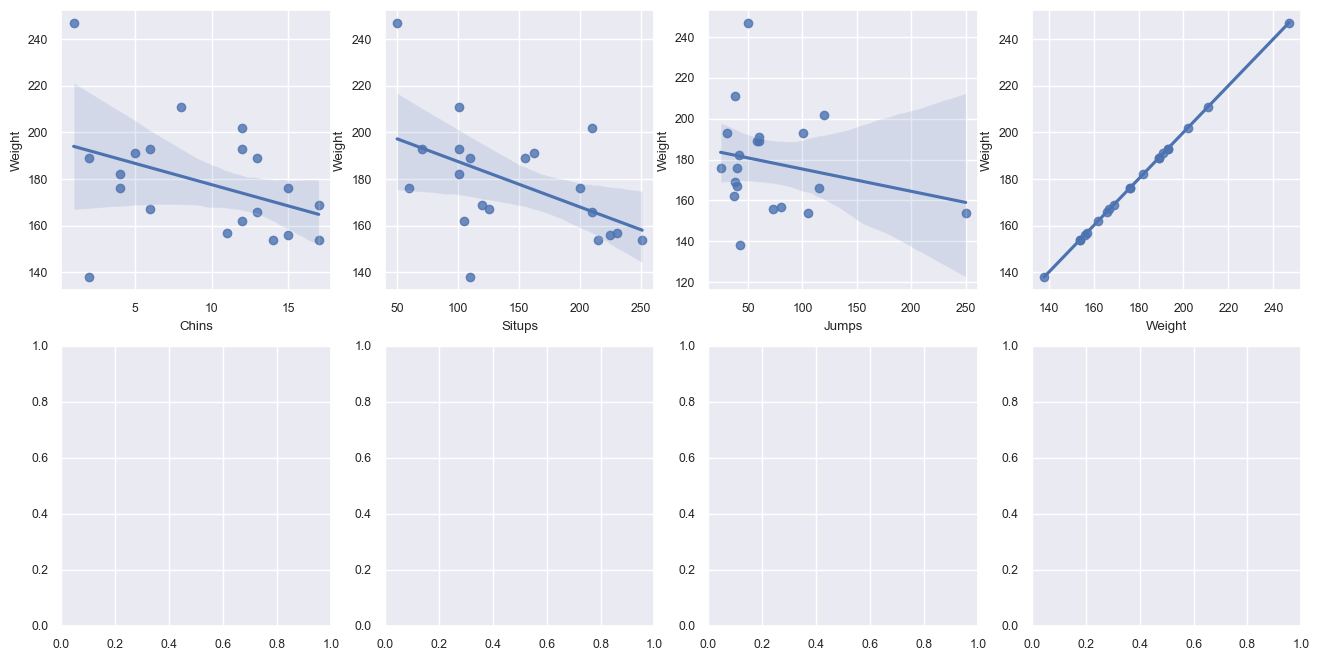

In [86]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps', 'Weight']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Weight', data=df, ax=axs[row][col])

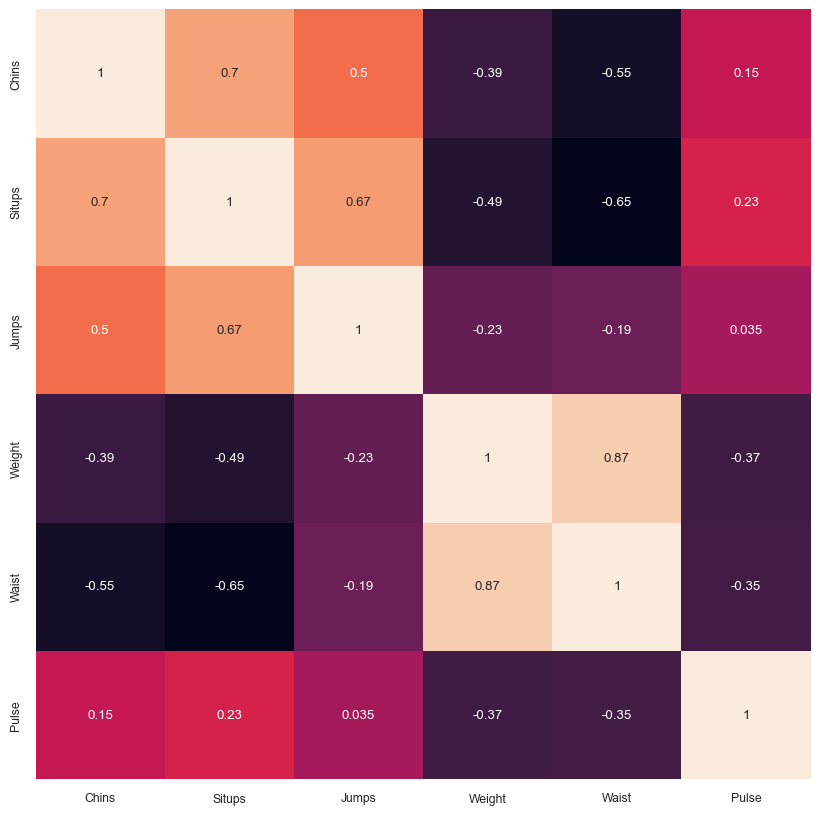

In [87]:
# Heatmap

df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

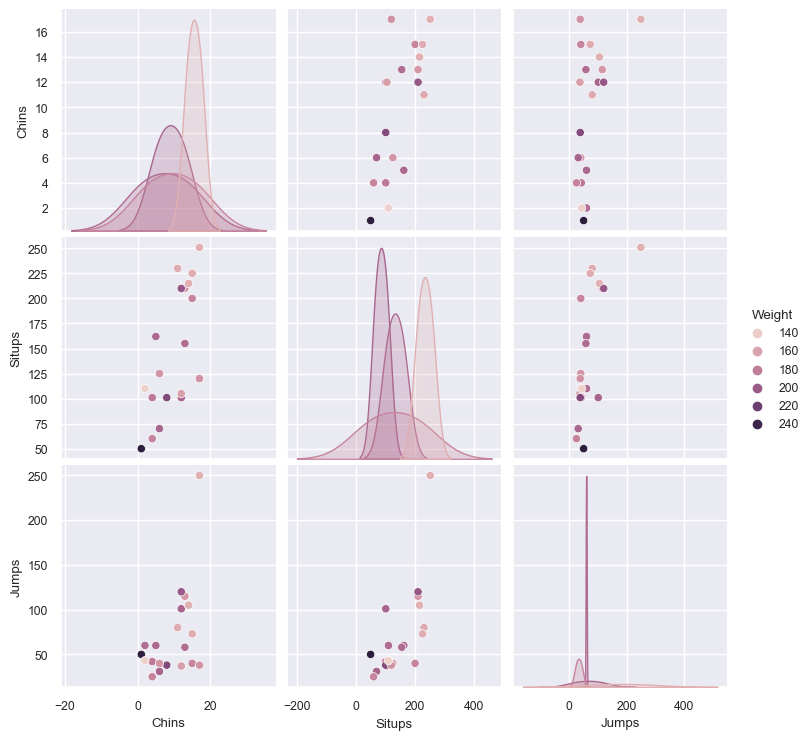

In [88]:
# EDA

sns.pairplot(df,
             vars=['Chins', 'Situps', 'Jumps'],
            hue ='Weight')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=df.loc[:, 'Weight']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [91]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [92]:
y_train.head()

14    193.0
16    176.0
10    169.0
8     176.0
5     182.0
Name: Weight, dtype: float64

In [93]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-1.  -0.1  0.2]
상수항(절편): 200.7


In [95]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [96]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 1559.793, RMSE: 39.494
Variance score : 0.115


In [97]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 200.65050193110943
회귀계수: [-1.  -0.1  0.2]


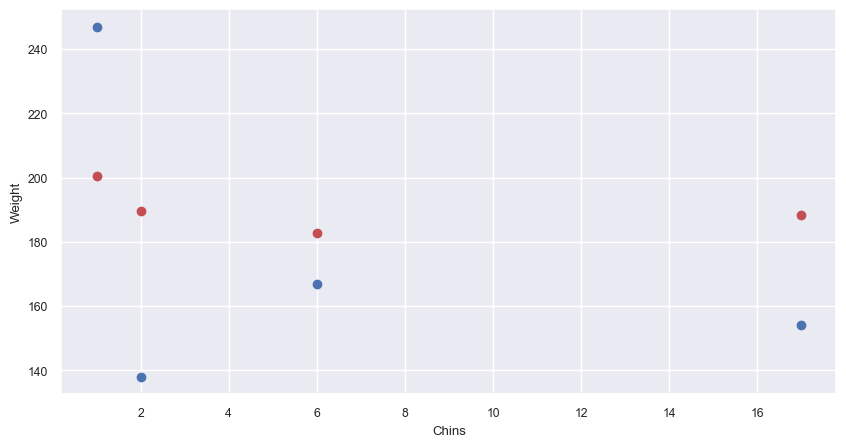

In [98]:
#예측값 저장

plt.figure(figsize=(10,5))
plt.xlabel('Chins')
plt.ylabel('Weight')
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_preds, c='r', label='y_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

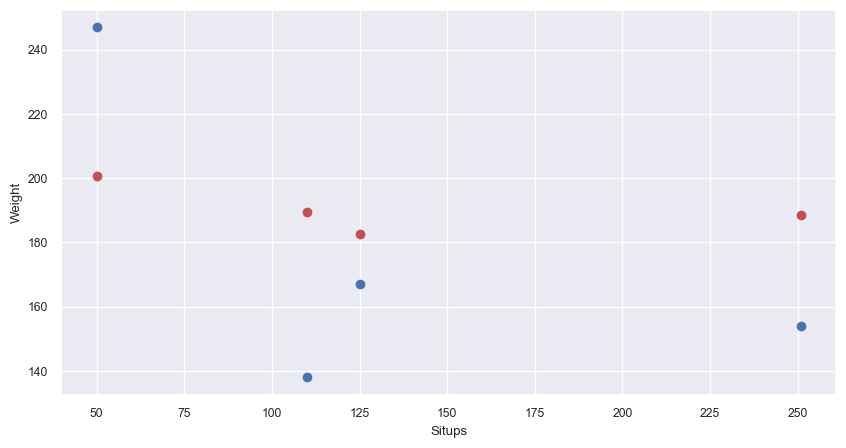

In [99]:
plt.figure(figsize=(10,5))
plt.xlabel('Situps')
plt.ylabel('Weight')
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_preds, c='r', label='y_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

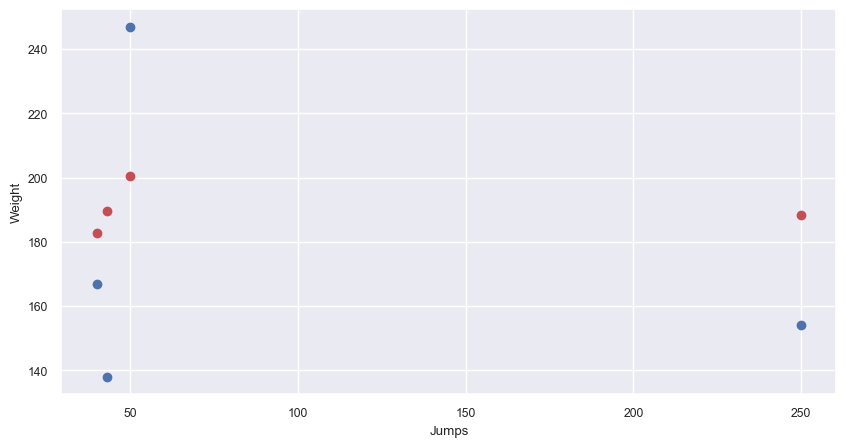

In [100]:
plt.figure(figsize=(10,5))
plt.xlabel('Jumps')
plt.ylabel('Weight')
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], y_preds, c='r', label='y_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()